<a href="https://colab.research.google.com/github/gabrieleite/Projeto_Integrador_2022/blob/main/C%C3%B3pia_de_Projeto_Integrador_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**Pandas** 

A biblioteca Pandas é uma biblioteca Python para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis ​​pelo usuário. A biblioteca oferece várias maneiras de remodelar e reestruturar os DataFrames. Esses métodos variam de simples e fáceis até poderosos e complexos. (**VOITTO**, 2022)

O pandas permite trabalhar com diferentes tipos de dados, por exemplo: dados tabulares, como uma planilha Excel ou uma tabela SQL; dados ordenados de modo temporal ou não; matrizes; qualquer outro conjunto de dados, que não necessariamente precisem estar rotulados; (**Harve**, 2022)

**Matplotlib**

Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas mais fáceis e as difíceis possíveis. (**Matplotlib**, 2022)

**Seaborn**

Seaborn é uma biblioteca que usa o Matplotlib para plotar gráficos. Ele será usado para visualizar distribuições aleatórias. (**W3schools**, 2022)

**Numpy**

O pacote NumPy é uma biblioteca de código aberto destinada a realizar operações em arrays multidimensionais, amigavelmente denominada como ndarray nesta biblioteca. A biblioteca oferece operações rápidas para tratamento e limpeza de dados, geração de subconjuntos e filtragens, estatísticas descritivas, manipulação de dados relacionais, manipulações de dados em grupos, entre outros tipos de processamento.(**Harve**, 2022)

# Adicionando os dados nos gráficos de barras horizontais

In [2]:
def emcima(rects, ax):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height), 
                xytext = (0, 3),
                textcoords="offset points",
                ha = 'center', va='bottom')

#Importando os Dados 

In [3]:
#Importação dos dados
dados = pd.read_csv('/content/ocorrencias_cenipa.csv')

# Visualizando o conjunto de dados

In [4]:
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


#Dados por Região

In [ ]:
regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
           'Centro Oeste': ['MT', 'MS', 'GO'],
           'Sudeste': ['SP', 'RJ', 'ES', 'MG'], 
           'Sul': ['PR', 'RS', 'SC']}

tipos = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

um = {i: [len([k for k in list(dados.loc[dados['tipo'] == i, ['estado']]['estado'])
              if k in regioes[j]]) for j in regioes.keys()] for i in tipos}

um['Região'] = list(regioes.keys())
dados_por_regiao = pd.DataFrame(um)

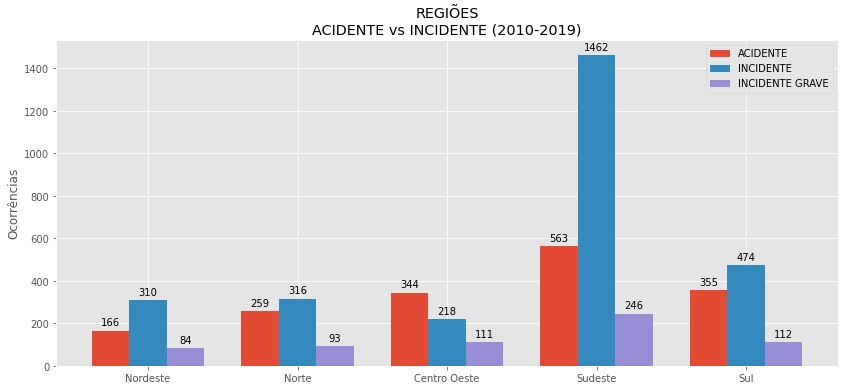

In [ ]:
#Visualizando os dados no gráfico
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1 ]
r3 = [ x + width for x in r2 ]

rects1 = ax.bar(r1, dados_por_regiao['ACIDENTE'], width, label = 'ACIDENTE')
rects2 = ax.bar(r2, dados_por_regiao['INCIDENTE'], width, label = 'INCIDENTE')
rects3 = ax.bar(r3, dados_por_regiao['INCIDENTE GRAVE'], width, label = 'INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('REGIÕES\nACIDENTE vs INCIDENTE (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_por_regiao['Região'])
ax.legend()

emcima(rects1, ax)
emcima(rects2, ax)
emcima(rects3, ax)

plt.show()

Após análise dos dados obtidos pelo gráfico, é possível notar que a região que possui maior incidência de todos os três tipos de tipos de acidentes é a região **Sudeste**.

Ainda analisando a regiçai **Sudeste**, podemos ver que dos três tipos de acidentes, o incidente o obtêm a porcentagem de aproximadamente 64%. 

A região que possui menos ocorrências é a **Nordeste**, com, ao todo, 560 ocorrências, sendo a maior incidência delas em **Incidentes** (~55%).

# Percentual por Tipos de Acidentes

In [13]:
cores_tipo = ['#87CEFA','#FF69B4', '#FFD700']
cores_ano = ['#87CEFA','#FF69B4', '#FFD700', "#9b59b6", "#e74c3c", '#8B0000', '#C0C0C0']
cor1 = ['#87CEFA']

In [ ]:
tipo = dados['tipo'].value_counts()
tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE']
acidente = tipo['ACIDENTE']
incidente = tipo['INCIDENTE']
incidente_grave = tipo['INCIDENTE GRAVE']

In [ ]:
porc_acidente = tipo['ACIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente = tipo['INCIDENTE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
porc_incidente_grave = tipo['INCIDENTE GRAVE']/(tipo['ACIDENTE'] + tipo['INCIDENTE'] + tipo['INCIDENTE GRAVE'])*100
print('Acidente: {} ({:.2f}%)'.format(acidente,porc_acidente))
print('Incidente: {} ({:.2f}%)'.format(incidente,porc_incidente))
print('Incidente Grave: {} ({:.2f}%)'.format(incidente_grave,porc_incidente_grave))

Acidente: 1694 (32.32%)
Incidente: 2887 (55.07%)
Incidente Grave: 661 (12.61%)


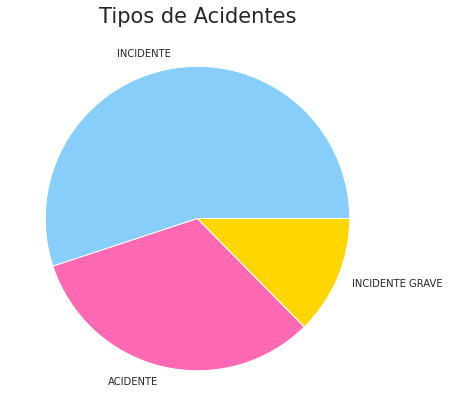

In [7]:
fig = plt.figure(figsize=(7,7))
sns.set_style('ticks')
tipo = dados['tipo'].value_counts()
tipo_num = [tipo[0],tipo[1], tipo[2]]
plt.pie(tipo_num, labels=['INCIDENTE','ACIDENTE', 'INCIDENTE GRAVE'],colors=cores_tipo)
plt.title('Tipos de Acidentes',fontsize=21);

Ao observar o gráfico podemos notar que **Incidentes** possuem um percentual mais alto, com aproximadamente 56%. 

O mais baixo em quesito percentuals são os **Incidentes Graves** com 12%. 

E entre eles, ficam os **Acidentes** com 32%.


# Por Ano de Ocorrência

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


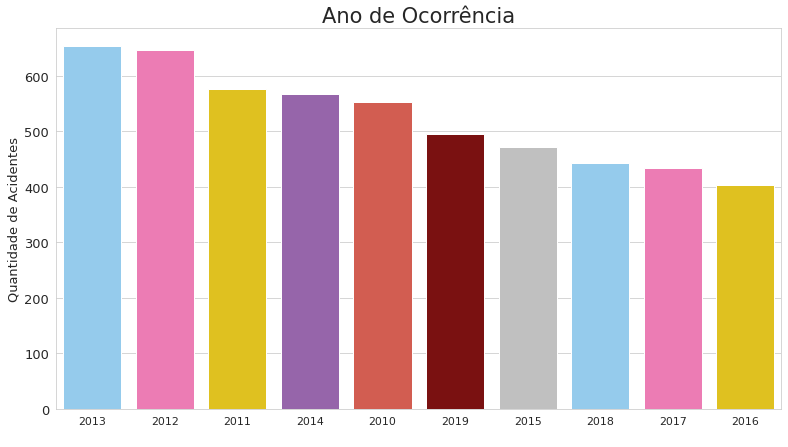

In [9]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13,7))
sns.countplot('ano',order = dados['ano'].value_counts().index,palette=cores_ano,data=dados)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Ano de Ocorrência',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('Quantidade de Acidentes',fontsize=13)
fig.savefig('ano_ocorrencia.png');

Analisando o gráfico acima, podemos obter a informação de quem o ano que mais ocorreram acidentes foi o de **2013**. 

Havendo uma crescente se formos analisar o ano que **2010** que obteve um número abaixo de 500, após 2010, nos anos **2011**, **2012** e **2013** obtivemos um número maior de acidentes. 

Após esses anos, em **2014 até 2016** obtivemos uma diminuição de ocorrências. Porém após **2016**, o número cresceu.



#Ocorrência por Estado

In [12]:
#Porcentagem
dados['estado'].value_counts()/dados['estado'].value_counts().sum()*100

SP    23.636017
MG     9.194964
RJ     9.156810
PR     8.412820
RS     6.371614
GO     5.455933
PA     5.017169
MT     4.864556
AM     4.139641
BA     3.815338
SC     3.166730
MS     2.518123
DF     2.460893
PE     1.716902
CE     1.487982
ES     1.335368
MA     1.297215
AC     1.030141
RR     0.934758
TO     0.877528
PI     0.686761
AL     0.572301
RO     0.572301
PB     0.438764
SE     0.400610
RN     0.267074
AP     0.171690
Name: estado, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Ocorrências')

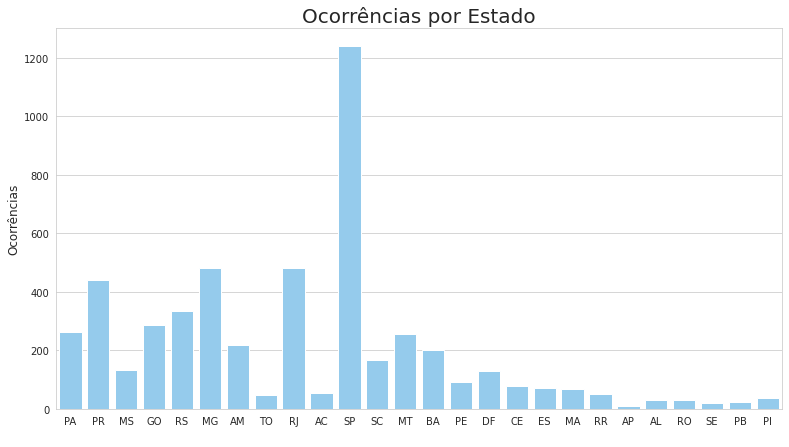

In [26]:
fig1 = plt.figure(figsize=(13,7))
y = dados['estado'].count()
sns.countplot('estado', palette=cor1, data=dados)
plt.xlim(-0.5,25.5)
plt.title('Ocorrências por Estado', fontsize=20)
plt.xlabel(' ')
plt.ylabel('Ocorrências', fontsize=12)

Analisando o gráfico acima, podemos obter as seguintes informações:



*   O estado com maiores ocorrências é o estado de **São Paulo**, com ~24%, com uma distância grande do segundo lugar, o estado de **Minas Gerais** (9%). 
*   O estado com menores ocorrências é o estado do **Amapá**, com menos de 1% de ocorrências. 
*   Acompanhando o estado do Amapá, os estados de **Roraima**, **Tocantins**, **Piauí**, **Alagoas**, **Rondônia**, **Paraíba**, **Sergipe**, **Rio Grande do Norte** também estão abaixo de 1%. 


